In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
trainData = pd.read_csv("./data//train.csv")
testData = pd.read_csv("./data/test.csv")
m=pd.read_csv("./data/sampleSubmission.csv")

# Any results you write to the current directory are saved as output.

In [4]:
print(trainData.head)

<bound method NDFrame.head of       Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0      0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1      1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2      2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3      3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4      4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   
..   ...         ...         ...         ...  ...  ..  ...  ...  ...  ..  ...   
132  132  06/25/2008     Trabzon       Other   FC   2  3.0  3.0  5.0   4  ...   
133  133  10/12/2006       İzmir  Big Cities   FC   4  5.0  4.0  4.0   2  ...   
134  134  07/08/2006     Kayseri       Other   FC   3  4.0  4.0  4.0   2  ...   
135  135  10/29/2010    İstanbul  Big Cities   FC   4  5.0  4.0  5.0   2  ...   
136  136  09/01/2009    İstanbul  Big Cities   FC   4  5.0  3.0  5.0   2  ...  

In [5]:
print(testData.head)

<bound method NDFrame.head of           Id   Open Date            City  City Group Type  P1   P2   P3   P4  \
0          0  01/22/2011           Niğde       Other   FC   1  4.0  4.0  4.0   
1          1  03/18/2011           Konya       Other   IL   3  4.0  4.0  4.0   
2          2  10/30/2013          Ankara  Big Cities   FC   3  4.0  4.0  4.0   
3          3  05/06/2013         Kocaeli       Other   IL   2  4.0  4.0  4.0   
4          4  07/31/2013  Afyonkarahisar       Other   FC   2  4.0  4.0  4.0   
...      ...         ...             ...         ...  ...  ..  ...  ...  ...   
99995  99995  01/05/2000         Antalya       Other   FC   5  5.0  4.0  4.0   
99996  99996  07/18/2011           Niğde       Other   IL   1  2.0  4.0  3.0   
99997  99997  12/29/2012        İstanbul  Big Cities   IL   4  5.0  4.0  4.0   
99998  99998  10/12/2013        İstanbul  Big Cities   FC  12  7.5  6.0  6.0   
99999  99999  10/05/2010        İstanbul  Big Cities   IL   2  5.0  4.0  4.0   

       P5

In [6]:
testData.shape

(100000, 42)

In [7]:
trainData.shape

(137, 43)

In [8]:
y = trainData['revenue']
trainData = trainData.drop('Id',axis=1)
trainData = trainData.drop('Open Date',axis=1)
trainData = trainData.drop('City',axis=1)
trainData = trainData.drop('City Group',axis=1)
trainData = trainData.drop('Type',axis=1)
trainData = trainData.drop('revenue',axis=1)

testData = testData.drop('Id',axis=1)
testData = testData.drop('Open Date',axis=1)
testData = testData.drop('City',axis=1)
testData = testData.drop('City Group',axis=1)
testData = testData.drop('Type',axis=1)

In [9]:
testData

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,1,4.0,4.0,4.0,1,2,5,4,5,5,...,2.0,3.0,0,0,0,0,0,0,0,0
1,3,4.0,4.0,4.0,2,2,5,3,4,4,...,1.0,3.0,0,0,0,0,0,0,0,0
2,3,4.0,4.0,4.0,2,2,5,4,4,5,...,2.0,3.0,0,0,0,0,0,0,0,0
3,2,4.0,4.0,4.0,2,3,5,4,5,4,...,2.0,3.0,0,4,0,0,0,0,0,0
4,2,4.0,4.0,4.0,1,2,5,4,5,4,...,5.0,3.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,5,5.0,4.0,4.0,2,2,5,5,4,4,...,2.0,3.0,0,0,0,0,0,0,0,0
99996,1,2.0,4.0,3.0,1,1,1,5,5,5,...,1.0,3.0,5,0,0,0,4,0,0,0
99997,4,5.0,4.0,4.0,1,2,5,3,4,5,...,4.0,1.0,5,5,3,2,4,4,4,2
99998,12,7.5,6.0,6.0,4,4,10,10,10,10,...,7.5,5.0,0,0,0,4,0,0,0,0


In [10]:
X=trainData

In [11]:
X
print(trainData.head)

<bound method NDFrame.head of      P1   P2   P3   P4  P5  P6  P7  P8  P9  P10  ...  P28  P29  P30  P31  P32  \
0     4  5.0  4.0  4.0   2   2   5   4   5    5  ...  2.0  3.0    5    3    4   
1     4  5.0  4.0  4.0   1   2   5   5   5    5  ...  3.0  3.0    0    0    0   
2     2  4.0  2.0  5.0   2   3   5   5   5    5  ...  1.0  3.0    0    0    0   
3     6  4.5  6.0  6.0   4   4  10   8  10   10  ...  2.5  7.5   25   12   10   
4     3  4.0  3.0  4.0   2   2   5   5   5    5  ...  1.0  3.0    5    1    3   
..   ..  ...  ...  ...  ..  ..  ..  ..  ..  ...  ...  ...  ...  ...  ...  ...   
132   2  3.0  3.0  5.0   4   2   4   4   4    4  ...  2.0  3.0    0    0    0   
133   4  5.0  4.0  4.0   2   3   5   4   4    5  ...  3.0  3.0    0    0    0   
134   3  4.0  4.0  4.0   2   3   5   5   5    5  ...  2.0  3.0    0    0    0   
135   4  5.0  4.0  5.0   2   2   5   5   5    5  ...  3.0  3.0    0    0    0   
136   4  5.0  3.0  5.0   2   2   5   4   4    5  ...  3.0  3.0    0    0    0  

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


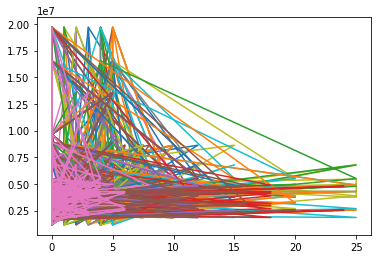

In [12]:
plt.plot(X,y)

In [13]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
pred=lm.predict(testData)
print(pred)
print(pred.shape)
#print(trainData.shape)

[5760599.0676968  3815315.1952025  2255464.38921502 ... 6082521.75248059
 3544592.81445758 6775983.80089953]
(100000,)


In [15]:
sc=lm.score(X,y)
print(sc)

0.29020445161234254


In [ ]:
#Accuracy is too low because data is very less in trainData

In [17]:
testData = pd.read_csv("./data/test.csv")
submission = pd.DataFrame({
        "Id": testData["Id"],
        "Prediction": pred
    })
submission.to_csv('LinearRegressionSimple.csv',header=True, index=False)